In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import blit_rooms
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.rooms import RoomAreas, extract_rooms, create_orientation_mask
from minimal.walls import find_walls, intersect_rooms, join_wall_corners

%matplotlib inline

In [61]:
%%time
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_02.pth"))
rooms = extract_rooms(pm)

CPU times: user 1.34 s, sys: 5 ms, total: 1.34 s
Wall time: 1.35 s


In [62]:
inner_mask, walls_mask = intersect_rooms(rooms)

tensor(True)


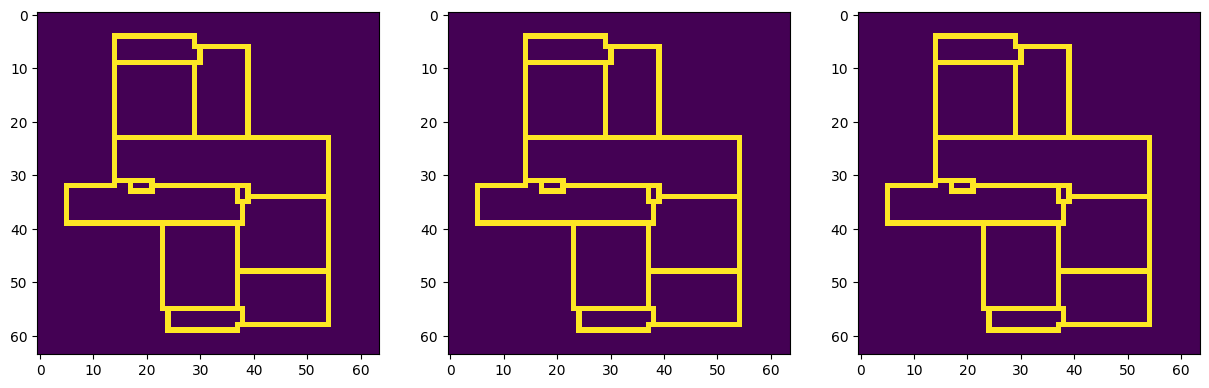

In [65]:
from minimal.walls import join_wall_corners

walls_mask = join_wall_corners(walls_mask, inner_mask)

print(torch.all(walls_mask * inner_mask == walls_mask))

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(walls_mask)

plt.subplot(132)
plt.imshow(walls_mask)

plt.subplot(133)
plt.imshow(walls_mask * inner_mask)

In [66]:
rect_mask = sum(room.to_mask() * (i + 1) for i, room in enumerate(rooms))

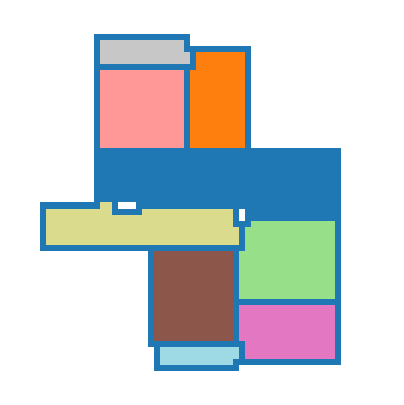

In [67]:
rooms_with_walls = rect_mask.clone()
rooms_with_walls[torch.where(walls_mask == 1)] = 1

plt.figure(figsize=(5,5))
cmap = ListedColormap(['white', 'black', *plt.get_cmap('tab20').colors])
plt.axis("off")
plt.imshow(rooms_with_walls, cmap=cmap)